# ***Setting up envirement***


In [ ]:
!pip install pandas
!pip install tensorflow==1.15

In [ ]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
# Read database and print shape
pd.set_option('display.max_columns', None)
covid = pd.read_csv("https://raw.githubusercontent.com/netanelin/COVID-19-Risk-Prediction/main/covid.csv", 
                    encoding = "ISO-8859-1", low_memory = False)
print(covid.shape)
covid.head()

---
# ***Process and clean data***

In [ ]:
# Cleaning the data to keep only the rows containing 1, 2. values as 97 and 99 are essentialling missing data

covid = covid.loc[(covid.covid_res == 1)]
covid = covid.loc[(covid.sex == 1) | (covid.sex == 2)]
covid = covid.loc[(covid.pneumonia == 1) | (covid.pneumonia == 2)]
covid = covid.loc[(covid.diabetes == 1) | (covid.diabetes == 2)]
covid = covid.loc[(covid.copd == 1) | (covid.copd == 2)]
covid = covid.loc[(covid.asthma == 1) | (covid.asthma == 2)]
covid = covid.loc[(covid.inmsupr == 1) | (covid.inmsupr == 2)]
covid = covid.loc[(covid.hypertension == 1) | (covid.hypertension == 2)]
covid = covid.loc[(covid.other_disease == 1) | (covid.other_disease == 2)]
covid = covid.loc[(covid.cardiovascular == 1) | (covid.cardiovascular == 2)]
covid = covid.loc[(covid.obesity == 1) | (covid.obesity == 2)]
covid = covid.loc[(covid.renal_chronic == 1) | (covid.renal_chronic == 2)]
covid = covid.loc[(covid.tobacco == 1) | (covid.tobacco == 2)]
covid.shape

(218902, 23)

In [ ]:
# Modifying data to get it converted to One Hot Encoded data

covid.sex = covid.sex.apply(lambda x: 0 if x == 1 else 1)                       # female = 0, male = 1
covid.patient_type = covid.patient_type.apply(lambda x: x if x == 1 else 0)     # no = 0, yes = 1
covid.pneumonia = covid.pneumonia.apply(lambda x: x if x == 1 else 0)           
covid.diabetes = covid.diabetes.apply(lambda x: x if x == 1 else 0)             
covid.copd = covid.copd.apply(lambda x: x if x == 1 else 0)                     
covid.asthma = covid.asthma.apply(lambda x: x if x == 1 else 0)                 
covid.inmsupr = covid.inmsupr.apply(lambda x: x if x == 1 else 0)               
covid.hypertension = covid.hypertension.apply(lambda x: x if x == 1 else 0)     
covid.other_disease = covid.other_disease.apply(lambda x: x if x == 1 else -0)  
covid.cardiovascular = covid.cardiovascular.apply(lambda x: x if x == 1 else 0) 
covid.obesity = covid.obesity.apply(lambda x: x if x == 1 else 0)               
covid.renal_chronic = covid.renal_chronic.apply(lambda x: x if x == 1 else 0)   
covid.tobacco = covid.tobacco.apply(lambda x: x if x == 1 else 0)               
covid.date_died = covid.date_died.apply(lambda x: 0 if x == "9999-99-99" else 1)
covid.pregnancy = covid.pregnancy.apply(lambda x: x if x == 1 else 0)           
covid.intubed = covid.intubed.apply(lambda x: x if x == 1 else 0)                   
covid.icu = covid.icu.apply(lambda x: x if x == 1 else 0)  

In [ ]:
# Divide age column to 12 age groups
for i in range(1,13):
  covid['age_group_%d' %i] = covid['age']
  covid['age_group_%d' %i]  = covid['age_group_%d' %i].apply(lambda x: 1 if (x>=(i-1)*10 and x<i*10) else 0) 

# Creating the label column from summing three columns of the data. 
# This column represents whether the patient is at risk from covid.
covid = covid.rename(columns={"date_died": "died"})
covid['at_risk'] = covid['died']+covid['intubed']+covid['icu']
covid.at_risk = covid.at_risk.apply(lambda x: 1 if x > 0 else 0) 
covid.shape

(218902, 36)

In [ ]:
# We will go ahead and drop a few columns which are intuitively not very useful to us, 
# either because they have a huge number of empty data(97, 98, 99) or they are not just 
# significant in predicting death risk requirement as we can not standardise them to a meaningful feature.
covid.drop(columns = ['id', 'contact_other_covid', 'covid_res', 'entry_date', 'age',
                      'date_symptoms', 'died', 'icu', 'pregnancy', 'intubed'], inplace=True)

# Normalize the cleaned data
# covid = (covid-covid.mean())/covid.std()
# covid.at_risk = covid.at_risk.apply(lambda x: 1 if x > 0 else 0) 


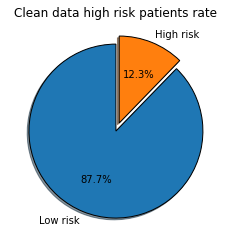

,sex,patient_type,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,age_group_1,age_group_2,age_group_3,age_group_4,age_group_5,age_group_6,age_group_7,age_group_8,age_group_9,age_group_10,age_group_11,age_group_12,at_risk
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
# Save to file
#covid.to_csv(r'/content/data/normalized covid.csv')

slices = [covid.shape[0], covid['at_risk'].sum()]
labels = ['Low risk', 'High risk']
explode = [0, 0.1]

plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Clean data high risk patients rate")
plt.show()

covid.head()

---
# ***Split data***

In [ ]:
# split the data to train(80%), validation(14%) and test(6%)
train, validation = train_test_split(covid, test_size=0.2, shuffle=True)
validation, test = train_test_split(validation, test_size=0.3, shuffle=True)

# split each dataset to features(x) and labels(y)
train_y = train.at_risk.to_numpy()
train_y = np.reshape(train_y, (len(train_y), 1))
train_x = train.drop(columns = ['at_risk']).to_numpy()

validation_y = validation.at_risk.to_numpy()
validation_y = np.reshape(validation_y, (len(validation_y), 1))
validation_x = validation.drop(columns = ['at_risk']).to_numpy()

test_y = test.at_risk.to_numpy()
test_y = np.reshape(test_y, (len(test_y), 1))
test_x = test.drop(columns = ['at_risk']).to_numpy()

---
# ***Simple Logistic regression***

In [ ]:
# Simple Logistic Regression
features = train_x.shape[1]
x = tf.placeholder(tf.float32, [None,features])
y_hat = tf.placeholder(tf.float32, [None,1])

W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))
z = tf.add(tf.matmul(x,W),b)
p = tf.nn.sigmoid(z)

# Loss function - Equivalent to 1/m(y_hat*-log(sigmoid(z))*c + (1-y_hat)*-log(1-sigmoid(z)))
c = (len(train_y)/np.count_nonzero(train_y == 1))
loss = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(y_hat, z, c))

update = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
sess = tf.Session() 
sess.run(tf.global_variables_initializer()) 

# train and print loss each 100 iteration
for i in range(0,10000): 
  sess.run(update, feed_dict = {x:train_x, y_hat:train_y})
  if(i % 100 == 0):
    print('iteration: ', i, '\n loss:', loss.eval(session=sess, feed_dict={x:train_x, y_hat:train_y}))

In [ ]:
# Print results for given data and labels

def run_simple_logistic(x_, y_):
  # Calculates the prediction for all objects in x_
  prediction = np.rint(p.eval(session=sess,feed_dict={x:x_, y_hat:y_}))

  true_positive, false_positive, false_negative = (1,0,0)
  # Compares the prediction of each object to its label
  for i in range(0,len(x_)):
    if (prediction[i] == 1 and y_[i] == 1):
      true_positive += 1
    elif(prediction[i] == 1 and y_[i] == 0):
      false_positive += 1
    elif(prediction[i] == 0 and y_[i] == 1):
      false_negative += 1

  # Calculate and print true positive and false positive precent
  positive = np.count_nonzero(y_ == 1)
  negative = len(y_)-positive
  print('true positive: ', "{:.1f}".format(100*true_positive/positive), '%')
  print('false positive: ', "{:.1f}".format(100*false_positive/negative), '%')

  # Calculate and print accuracy and F-measure
  accuracy = 100*np.sum(prediction == y_)/len(y_)
  recall = true_positive / (true_positive + false_negative)
  precision = true_positive / (true_positive + false_positive)
  eval = 2*(precision * recall) / (precision + recall)
  print('Accuracy:', "{:.1f}".format(accuracy), '%')
  print('F-measure: ', "{:.3f}".format(eval))

In [ ]:
# train and validation analysis
print('Train Analysis:')
run_simple_logistic(train_x, train_y)
print('\nValidation Analysis:')
run_simple_logistic(validation_x, validation_y)

Train Analysis:
true positive:  92.3 %
false positive:  19.0 %
Accuracy: 82.6 %
F-measure:  0.597

Validation Analysis:
true positive:  92.3 %
false positive:  18.8 %
Accuracy: 82.7 %
F-measure:  0.596


# **Logistic regression with neural network**

In [ ]:
# Logistic regression with neural network
features = train_x.shape[1]
x = tf.placeholder(tf.float32, [None,features])
y_hat = tf.placeholder(tf.float32, [None,1])

# Decide number of layers and neurons in each layer
layers = [10,1]
W = []
b = []

# create first layer
W.append(tf.Variable(tf.truncated_normal([features,layers[0]], stddev=0.1)))
b.append(tf.Variable(tf.constant(0.1, shape=[layers[0]])))
z = tf.add(tf.matmul(x,W[0]),b[0])
a = tf.nn.relu(z)

# loop to create the rest of the layers
for i in range(1,len(layers)):
  W.append(tf.Variable(tf.truncated_normal([layers[i-1], layers[i]], stddev=0.1)))
  b.append(tf.Variable(tf.constant(0.1, shape=[layers[i]])))
  z = tf.add(tf.matmul(a,W[i]),b[i])
  a = tf.nn.relu(z)
p = tf.nn.sigmoid(z)

c = len(train_y)/np.count_nonzero(train_y == 1)
ridge = 0.1*tf.nn.l2_loss(W[-1])
# Loss function Equivalent to: 1/m(y_hat*-log(sigmoid(z))*c + (1-y_hat)*-log(1-sigmoid(z))
loss = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(y_hat, z, c))

update = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
sess = tf.Session() 
sess.run(tf.global_variables_initializer()) 

# train and print loss each 100 iteration
for i in range(0,50000): 
  sess.run(update, feed_dict = {x:train_x, y_hat:train_y})
  if(i % 100 == 0): 
    print('iteration: ', i, '\n  loss:', loss.eval(session=sess, feed_dict={x:train_x, y_hat:train_y}))

In [ ]:
# Print results for given data and labels
def run_logistic_nn(x_, y_):
  # Calculates the prediction for all objects in x_
  prediction = np.rint(p.eval(session=sess,feed_dict={x:x_, y_hat:y_}))

  # Compares the prediction of each object to its label
  true_positive, false_positive, false_negative = (1,0,0)
  for i in range(0,len(x_)):
    if (prediction[i] == 1 and y_[i] == 1):
      true_positive += 1
    elif(prediction[i] == 1 and y_[i] == 0):
      false_positive += 1
    elif(prediction[i] == 0 and y_[i] == 1):
      false_negative += 1

  # Calculate and print true positive and false positive precent
  positive = np.count_nonzero(y_ == 1)
  negative = len(y_)-positive
  print('true positive: ', "{:.1f}".format(100*true_positive/positive), '%')
  print('false positive: ', "{:.1f}".format(100*false_positive/negative), '%')

  # Calculate and print accuracy and F-measure
  accuracy = 100*np.sum(prediction == y_)/len(y_)
  recall = true_positive / (true_positive + false_negative)
  precision = true_positive / (true_positive + false_positive)
  eval = 2*(precision * recall) / (precision + recall)
  print('Accuracy:', "{:.1f}".format(accuracy), '%')
  print('F-measure: ', "{:.3f}".format(eval))

In [ ]:
# Train and Validation analysis
print('Train Analysis:')
run_logistic_nn(train_x, train_y)
print('\nValidation Analysis:')
run_logistic_nn(validation_x, validation_y)


In [ ]:
# Test analysis
print('Test analysis:')
run_logistic_nn(test_x, test_y)

Test analysis:
true positive:  94.9 %
false positive:  19.0 %
Accuracy: 82.8 %
F-measure:  0.614


# **CNN**

In [ ]:
# CNN
features = train_x.shape[1]
x = tf.placeholder(tf.float32, shape=[None, features])
y_hat = tf.placeholder(tf.float32, shape=[None, 1])

# convolution layer with max pooling
W_conv = tf.Variable(tf.truncated_normal([2, 2, 1, 4], stddev=0.1))
b_conv = tf.Variable(tf.constant(0.1, shape=[4]))
x_ = tf.reshape(x, [-1,5,5,1]) 
h_conv = tf.nn.relu(tf.nn.conv2d(x_, W_conv, strides=[1, 1, 1, 1], padding='SAME') + b_conv)
h_pool = tf.nn.max_pool(h_conv, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')

# 2 fully connected layers
h_flat = tf.reshape(h_pool, [-1, 5*5*4])
W_fc1 = tf.Variable(tf.truncated_normal([5*5*4, 10], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[10]))
h_fc1 = tf.nn.relu(tf.matmul(h_flat, W_fc1) + b_fc1)

W_fc2 = tf.Variable(tf.truncated_normal([10, 1], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[1]))
h_fc2 = tf.add(tf.matmul(h_fc1,W_fc2),b_fc2)
y_conv = tf.nn.sigmoid(h_fc2)

c = (len(train_y)/np.count_nonzero(train_y == 1))
# Loss function Equivalent to: 1/m(y_hat*-log(sigmoid(z))*c + (1-y_hat)*-log(1-sigmoid(z))
loss = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(y_hat, h_fc2, c))

update = tf.train.AdamOptimizer(1e-2).minimize(loss)
sess = tf.Session() 
sess.run(tf.global_variables_initializer()) 

# train and print loss each 100 iteration
for i in range(0,2000): 
  sess.run(update, feed_dict = {x:train_x, y_hat:train_y})
  if(i % 100 == 0):
    print('iteration: ', i, '\n  loss:', loss.eval(session=sess, feed_dict={x:train_x, y_hat:train_y}))

In [ ]:
# Auxilary function to count specific elements in tensors
def tf_count(t, val):
    elements_equal_to_value = tf.equal(t, val)
    as_ints = tf.cast(elements_equal_to_value, tf.int32)
    count = tf.reduce_sum(as_ints)
    return count

prediction = tf.round(y_conv)
all = tf_count(y_hat,1)+tf_count(y_hat,0)
positive = tf_count(y_hat,1)
negative = all-positive

# calculate confusion matrix values
true_positive = tf_count(tf.add(prediction,y_hat),2)
false_positive = tf_count(tf.subtract(prediction,y_hat),1)
false_negative = tf_count(tf.subtract(y_hat,prediction),1)
counter = tf_count(tf.subtract(y_hat,prediction),0)
tp = 100*true_positive / positive
fp = 100*false_positive / negative

# calculate accuracy and F-measure
accuracy = 100*counter / all
recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
eval = 2*(precision * recall) / (precision + recall)

# Print results for given data and labels
def run_CNN(data_x, data_y):
  print('true positive:', "{:.1f}".format(tp.eval(session=sess,feed_dict={x:data_x, y_hat:data_y})), '%')
  print('false positive:', "{:.1f}".format(fp.eval(session=sess,feed_dict={x:data_x, y_hat:data_y})), '%')
  print('Accuracy:', "{:.1f}".format(accuracy.eval(session=sess,feed_dict={x:data_x, y_hat:data_y})), '%')
  print('F-measure: ', "{:.3f}".format(eval.eval(session=sess,feed_dict={x:data_x, y_hat:data_y})))

In [ ]:
# Train and Validation analysis
print('Train Analysis:')
run_CNN(train_x, train_y)
print('\nValidation Analysis:')
run_CNN(validation_x, validation_y)

In [ ]:
# Test analysis
print('Test analysis:')
run_CNN(test_x, test_y)

# **Comparison between models**

In [ ]:
models = [
          'Logistic Regression',  
          'NN',
          'CNN'
          ]
true_positive = [92.3, 94.9, 94.2]
false_positive = [18.8, 19, 19.1]
overall_accurecy = [82.7, 82.8, 82.6]


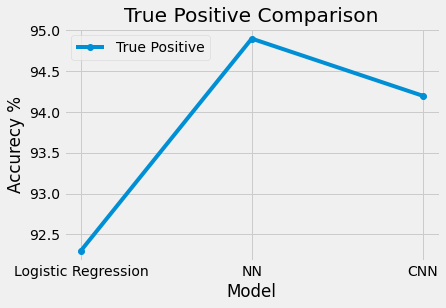

In [ ]:
plt.style.use("fivethirtyeight")

plt.plot(models, true_positive, marker='o', label='True Positive')
plt.title('True Positive Comparison')
plt.xlabel('Model')
plt.ylabel('Accurecy %')
plt.legend()
plt.show()

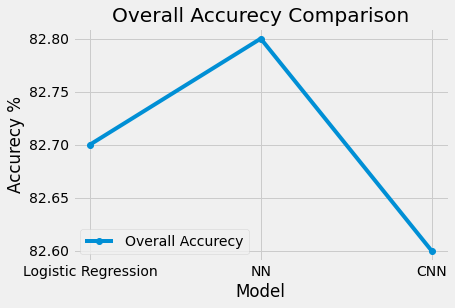

In [ ]:
plt.plot(models, overall_accurecy, marker='o', label='Overall Accurecy')
plt.title('Overall Accurecy Comparison')
plt.xlabel('Model')
plt.ylabel('Accurecy %')
plt.legend()
plt.show()

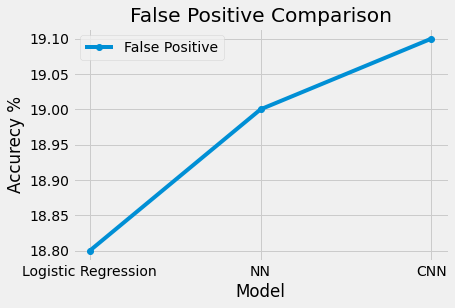

In [ ]:
plt.plot(models, false_positive, marker='o', label='False Positive')
plt.title('False Positive Comparison')
plt.xlabel('Model')
plt.ylabel('Accurecy %')
plt.legend()
plt.show()

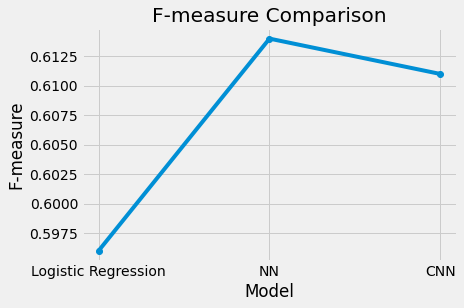

In [ ]:
# F-measure comparison graph
f_measure = [0.596, 0.614, 0.611]
plt.plot(models, f_measure, marker='o')
plt.title('F-measure Comparison')
plt.xlabel('Model')
plt.ylabel('F-measure')
plt.show()